<a href="https://colab.research.google.com/github/TesyarRAz/klasifikasi-transmisi-kendaraan/blob/main/klasifikasi_transmisi_kendaraan_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.115  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete  (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [3]:
%pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d021763a260edbcd24cfbf225d7120c325907e63c19d924b620d893144073d53
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

In [4]:
from getpass import getpass

ROBOFLOW_API_KEY = getpass("ROBOFLOW_API=")
WANDB_API_KEY = getpass("WANDB_API=")

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("bsi").project("klasifikasi-transmisi-kendaraan")
dataset = project.version(5).download("yolov8")

ROBOFLOW_API=··········
WANDB_API=··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.115, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Klasifikasi-Transmisi-Kendaraan-5 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 1882.31it/s]


In [5]:
!cat /content/Klasifikasi-Transmisi-Kendaraan-5/data.yaml

names:
- gigi
- kopling
- matic
nc: 3
roboflow:
  license: CC BY 4.0
  project: klasifikasi-transmisi-kendaraan
  url: https://universe.roboflow.com/bsi/klasifikasi-transmisi-kendaraan/dataset/5
  version: 5
  workspace: bsi
test: test/images
train: train/images
val: valid/images


In [6]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

results = model.train(data='/content/Klasifikasi-Transmisi-Kendaraan-5/data.yaml', epochs=200, patience=200)
results = model.val()

100%|██████████| 49.7M/49.7M [00:02<00:00, 19.0MB/s]
Ultralytics YOLOv8.0.115  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Klasifikasi-Transmisi-Kendaraan-5/data.yaml, epochs=200, patience=200, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

In [7]:
!ls /content/runs/detect/train/

args.yaml					   R_curve.png
confusion_matrix_normalized.png			   results.csv
confusion_matrix.png				   results.png
events.out.tfevents.1686351140.e413cd9a28fb.761.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights


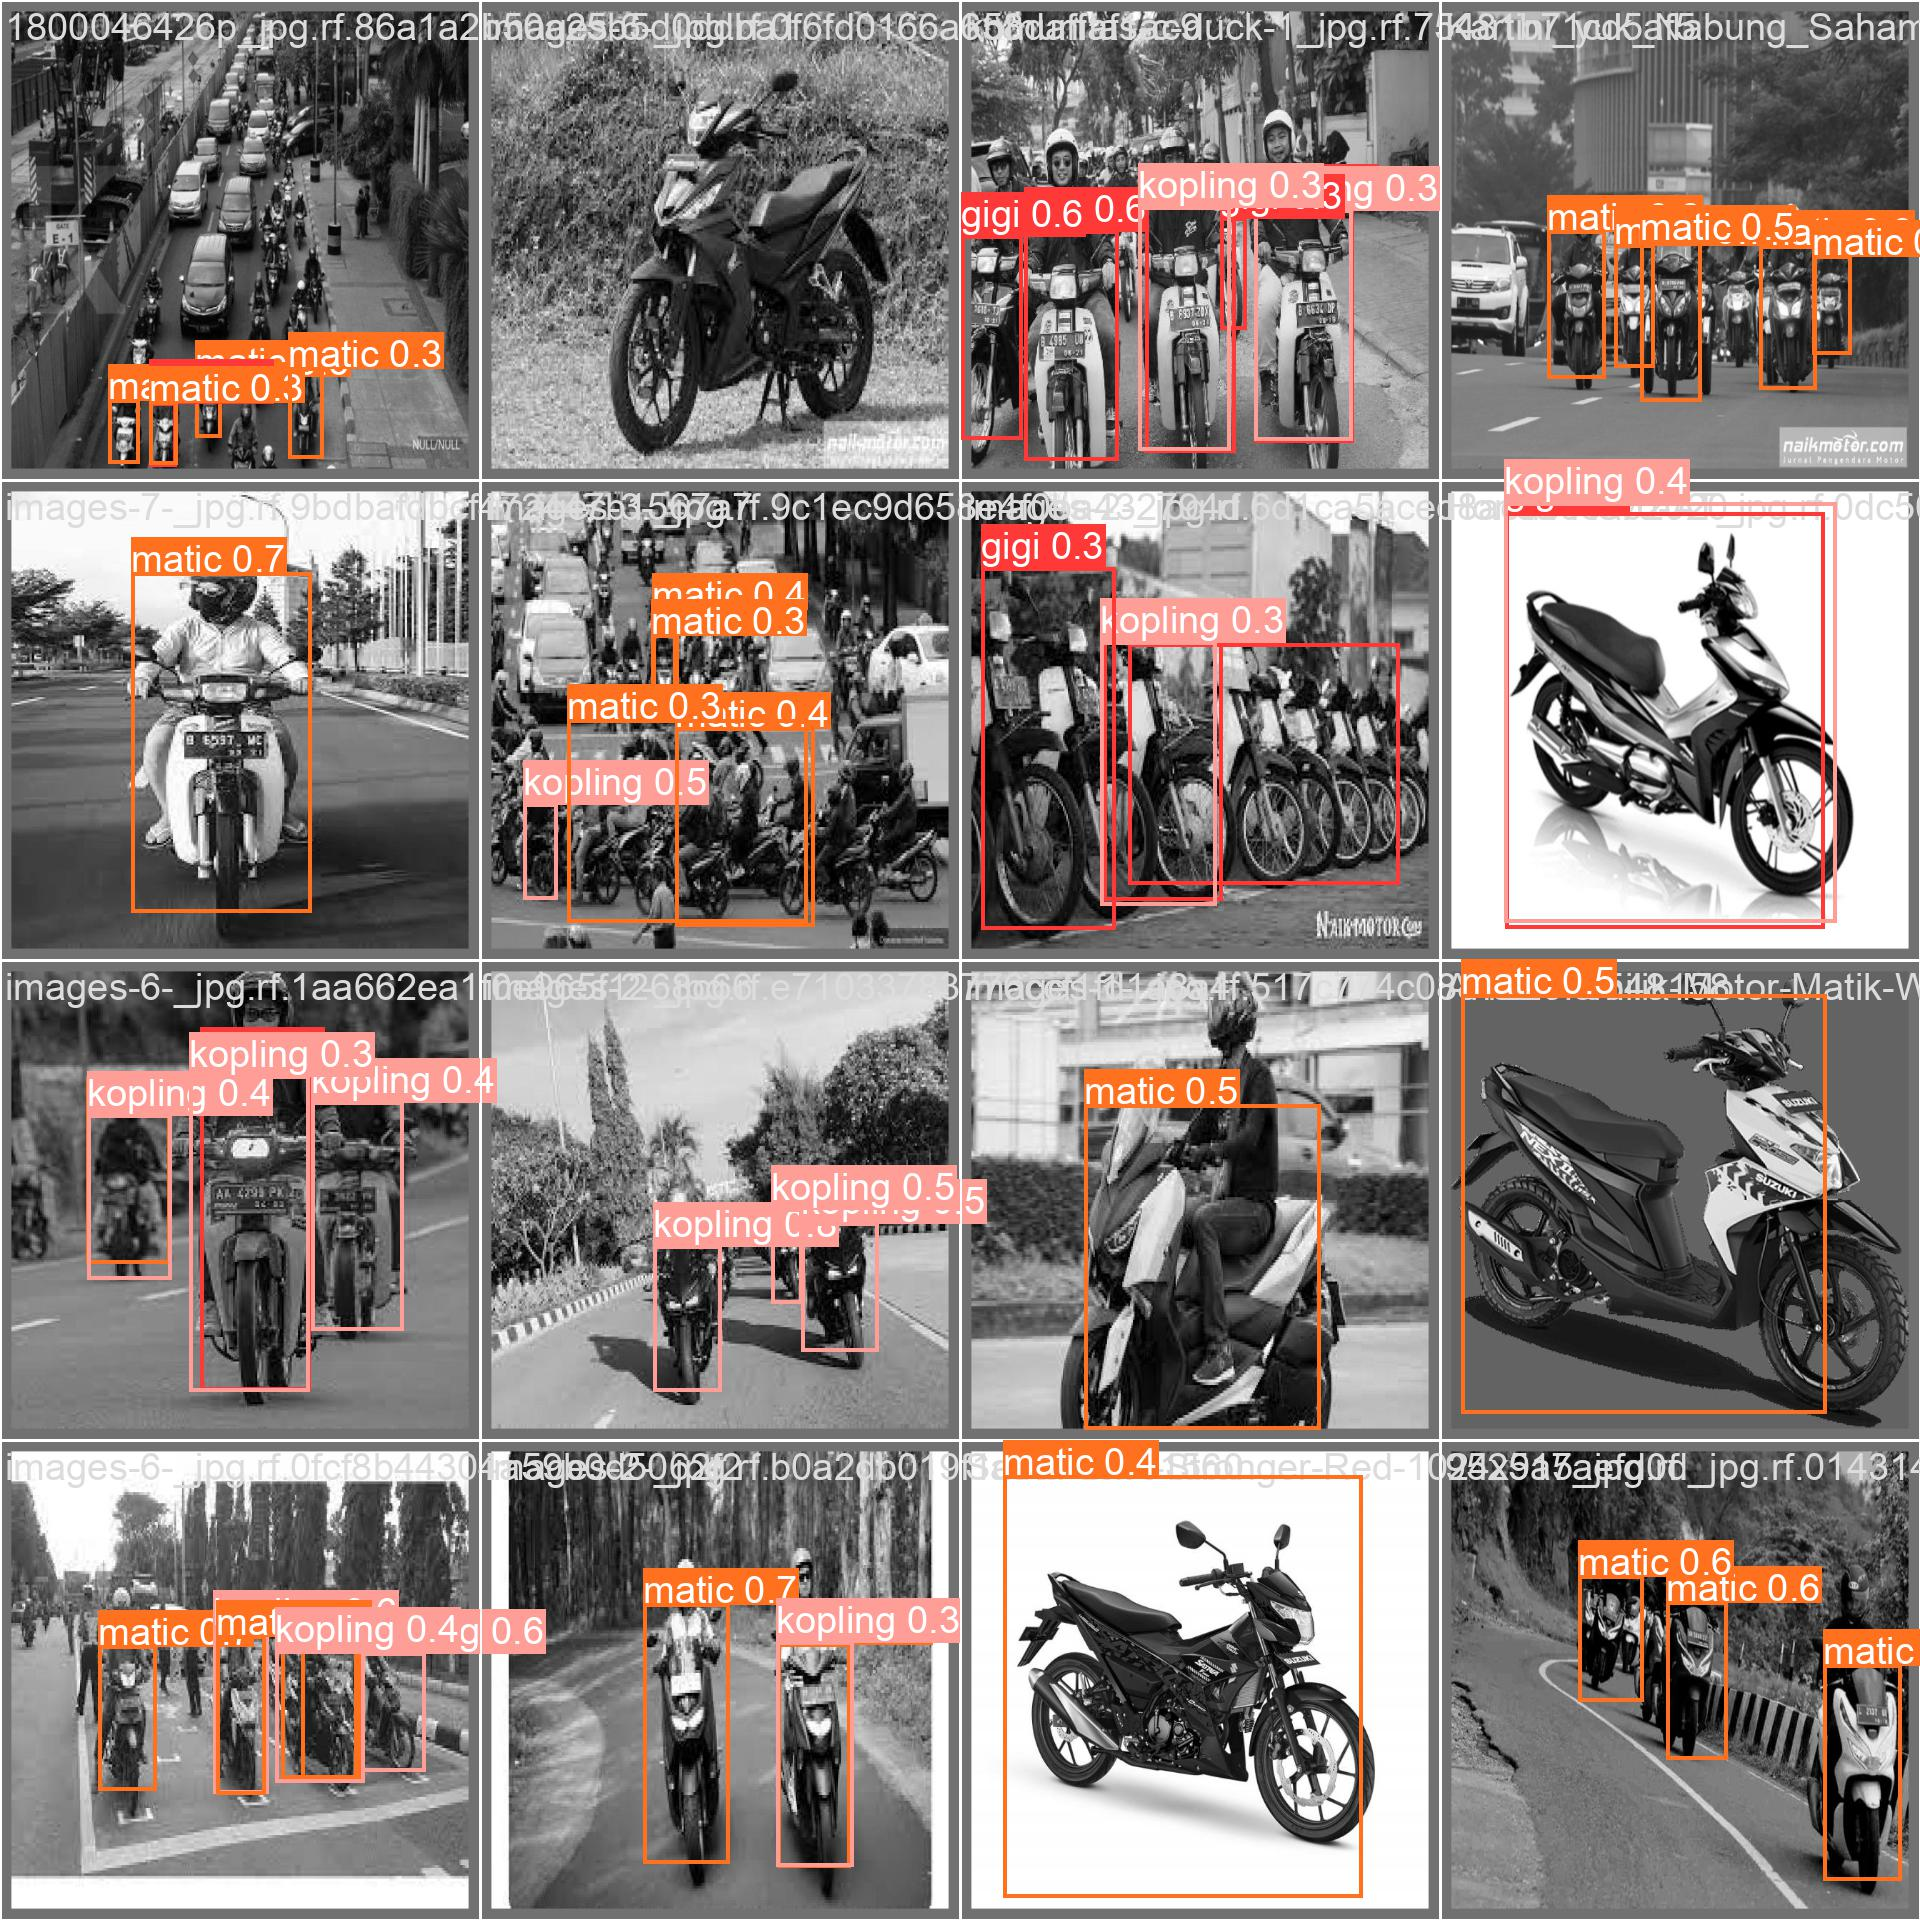

In [8]:
from IPython.display import display, Image

display(Image(filename='/content/runs/detect/train/val_batch0_pred.jpg'))

In [9]:
model.export(format='onnx', dynamic=True, optimizer="Adam")

Ultralytics YOLOv8.0.115  Python-3.10.12 torch-2.0.1+cu118 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 7, 8400) (49.6 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
      14.6/14.6 MB 218.9 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success  35.3s, saved as runs/detect/train/weights/best.onnx (98.7 MB)

Export complete (90.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/Klasifikasi-Transmisi-Kendaraan-5/data.yaml 
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'